In [90]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
!cd /content/gdrive/My\ Drive/deep-learning/assignment-2/ && \
python ptb-lm.py --model=RNN --optimizer=ADAM --initial_lr=1 --batch_size=2 --seq_len=20 --hidden_size=40 --num_layers=20 --dp_keep_prob=0.45 --save_best


########## Setting Up Experiment ######################

Putting log in RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=1_batch_size=2_seq_len=20_hidden_size=40_num_layers=20_dp_keep_prob=0.45_save_best_0
Using the GPU
Loading data from data
  vocabulary size: 10000

########## Running Main Loop ##########################

EPOCH 0 ------------------
step: 10	loss: 11447.999897003174	speed (wps):219.38833066492185
step: 2333	loss: 16638782.314167023	speed (wps):222.97754314587397


In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt


In [0]:
path = "/content/gdrive/My Drive/deep-learning/assignment-2/Learning-curves"
files = []

for r, d, f in os.walk(path):
  for file in f:
    files.append(file)
    


In [0]:
print(files)
# content/gdrive/My Drive/deep-learning/assignment-2/Learning-curves

['GRU_ADAM_model=GRU_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_4.npy', 'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_7.npy', 'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.55_2.npy', 'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=3_dp_keep_prob=0.35_3.npy', 'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=2000_num_layers=2_dp_keep_prob=0.35_3.npy', 'GRU_SGD_model=GRU_optimizer=SGD_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_4.npy', 'RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_pro

In [0]:
r = '/content/gdrive/My Drive/deep-learning/assignment-2/Learning-curves/'
lr = [['name','train_ppls', 'val_ppls', 'train_losses', 'val_losses']]

for f in files:
  a = np.ndarray.tolist(np.load(r+f))
  l = []
  for e in lr[0][1:]:
    l.append(a[e])
  lr.append([f] + l)



##QUESTION 4.1 : PLOTS OF vanilla parameters:

In [0]:
for e in lr:
  print(e[0])

name
GRU_ADAM_model=GRU_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_4.npy
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_7.npy
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.55_2.npy
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=3_dp_keep_prob=0.35_3.npy
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=2000_num_layers=2_dp_keep_prob=0.35_3.npy
GRU_SGD_model=GRU_optimizer=SGD_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_4.npy
RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.55_2.npy
RN

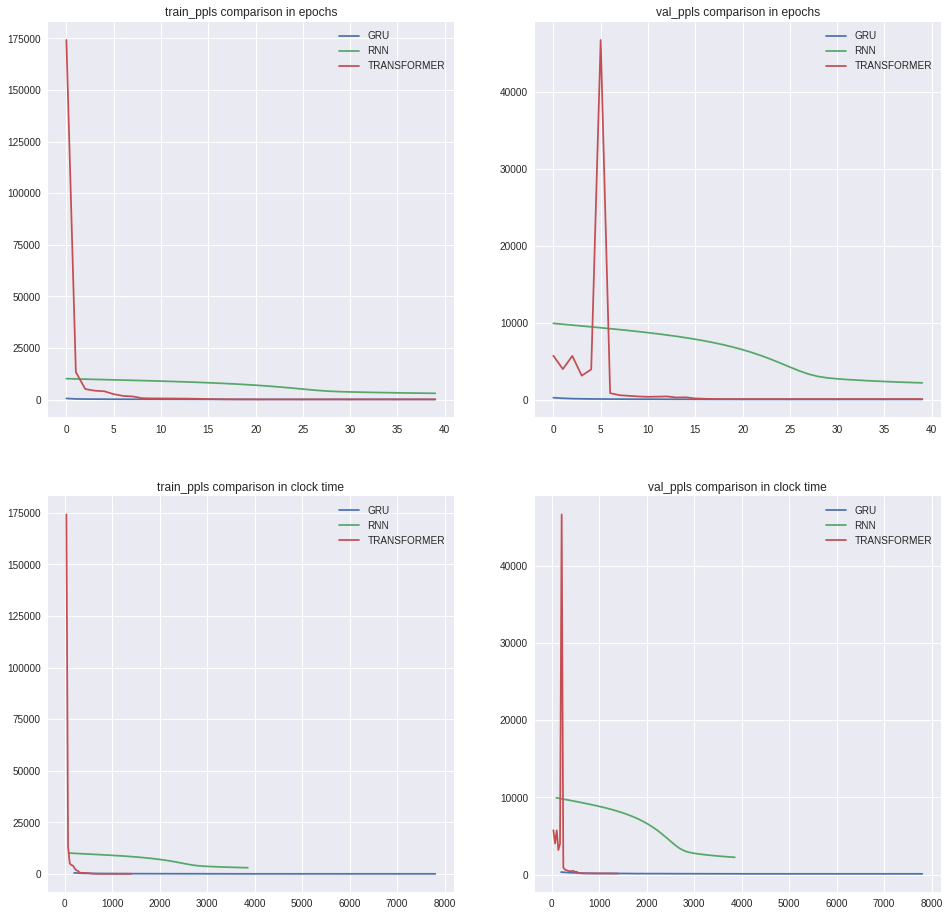

In [134]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(2, 2, 1)
plt.plot(lr[2][1], label= 'GRU')
plt.plot(lr[-1][1], label= 'RNN')
plt.plot(lr[-2][1], label= 'TRANSFORMER')
plt.title("train_ppls comparison in epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lr[2][2], label= 'GRU')
plt.plot(lr[-1][2], label= 'RNN')
plt.plot(lr[-2][2], label= 'TRANSFORMER')
plt.title("val_ppls comparison in epochs")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(clk_times[2][1], lr[2][1], label= 'GRU')
plt.plot(clk_times[-1][1],lr[-1][1], label= 'RNN')
plt.plot(clk_times[-2][1],lr[-2][1], label= 'TRANSFORMER')
plt.title("train_ppls comparison in clock time")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clk_times[2][1], lr[2][2], label= 'GRU')
plt.plot(clk_times[-1][1],lr[-1][2], label= 'RNN')
plt.plot(clk_times[-2][1],lr[-2][2], label= 'TRANSFORMER')
plt.title("val_ppls comparison in clock time")
plt.legend()

fig.set_figheight(16)
fig.set_figwidth(16)
plt.show()

##QUESTION 4.2 : Comparing different plans for each architechture 

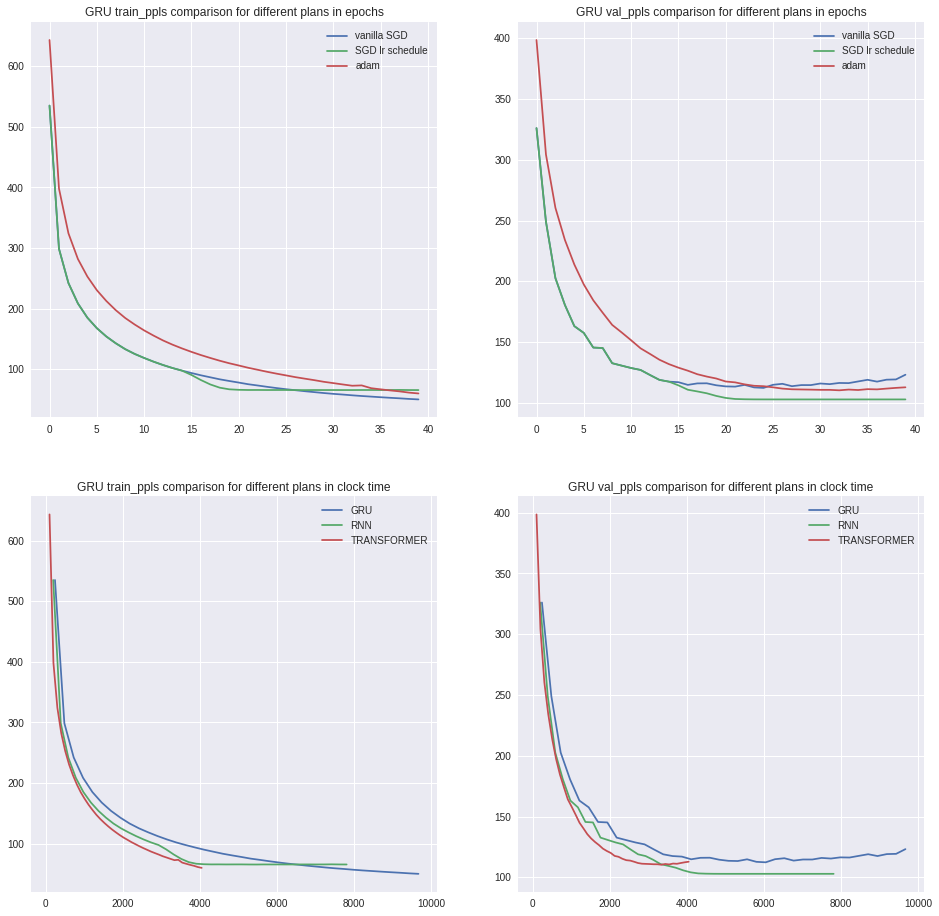

In [143]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(2, 2, 1)
plt.plot(lr[6][1], label= 'vanilla SGD')
plt.plot(lr[2][1], label= 'SGD lr schedule')
plt.plot(lr[1][1], label= 'adam')
plt.title("GRU train_ppls comparison for different plans in epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lr[6][2], label= 'vanilla SGD')
plt.plot(lr[2][2], label= 'SGD lr schedule')
plt.plot(lr[1][2], label= 'adam')
plt.title("GRU val_ppls comparison for different plans in epochs")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(clk_times[6][1], lr[6][1], label= 'GRU')
plt.plot(clk_times[2][1],lr[2][1], label= 'RNN')
plt.plot(clk_times[1][1],lr[1][1], label= 'TRANSFORMER')
plt.title("GRU train_ppls comparison for different plans in clock time")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clk_times[6][1], lr[6][2], label= 'GRU')
plt.plot(clk_times[2][1],lr[2][2], label= 'RNN')
plt.plot(clk_times[1][1],lr[1][2], label= 'TRANSFORMER')
plt.title("GRU val_ppls comparison for different plans in clock time")
plt.legend()

fig.set_figheight(16)
fig.set_figwidth(16)
plt.show()



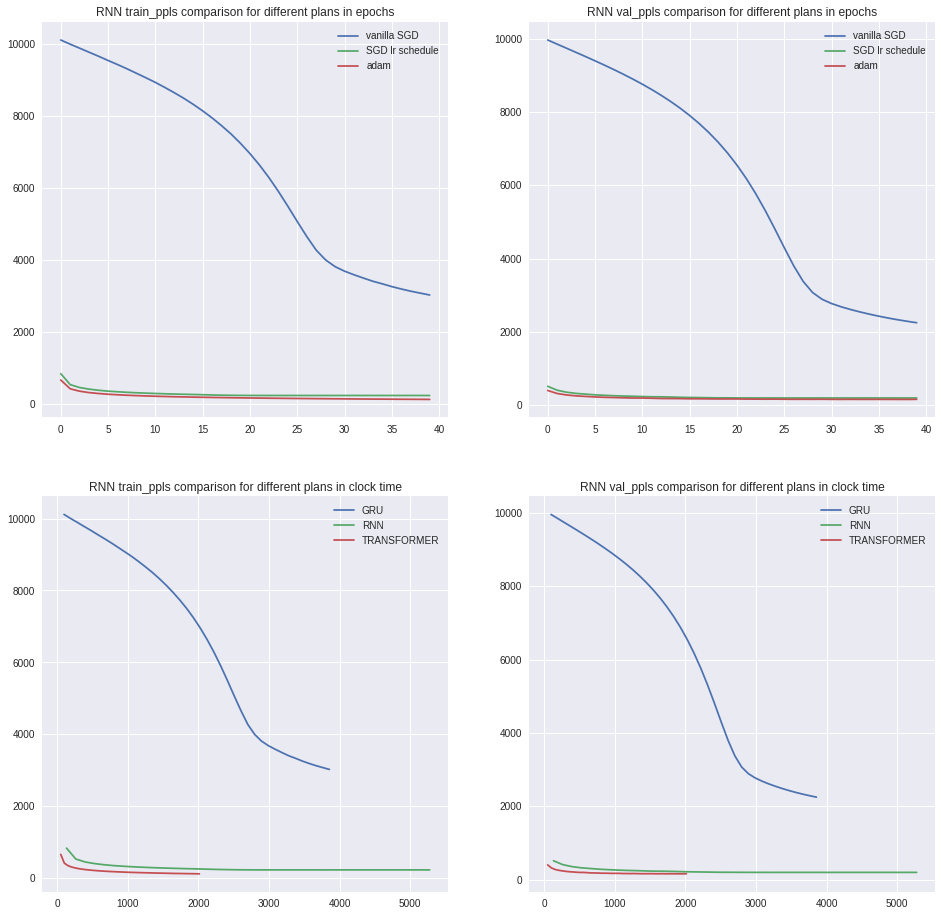

In [144]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(2, 2, 1)
plt.plot(lr[-1][1], label= 'vanilla SGD')
plt.plot(lr[10][1], label= 'SGD lr schedule')
plt.plot(lr[11][1], label= 'adam')
plt.title("RNN train_ppls comparison for different plans in epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lr[-1][2], label= 'vanilla SGD')
plt.plot(lr[10][2], label= 'SGD lr schedule')
plt.plot(lr[11][2], label= 'adam')
plt.title("RNN val_ppls comparison for different plans in epochs")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(clk_times[-1][1], lr[-1][1], label= 'GRU')
plt.plot(clk_times[10][1],lr[10][1], label= 'RNN')
plt.plot(clk_times[11][1],lr[11][1], label= 'TRANSFORMER')
plt.title("RNN train_ppls comparison for different plans in clock time")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clk_times[-1][1], lr[-1][2], label= 'GRU')
plt.plot(clk_times[10][1],lr[10][2], label= 'RNN')
plt.plot(clk_times[11][1],lr[11][2], label= 'TRANSFORMER')
plt.title("RNN val_ppls comparison for different plans in clock time")
plt.legend()

fig.set_figheight(16)
fig.set_figwidth(16)
plt.show()



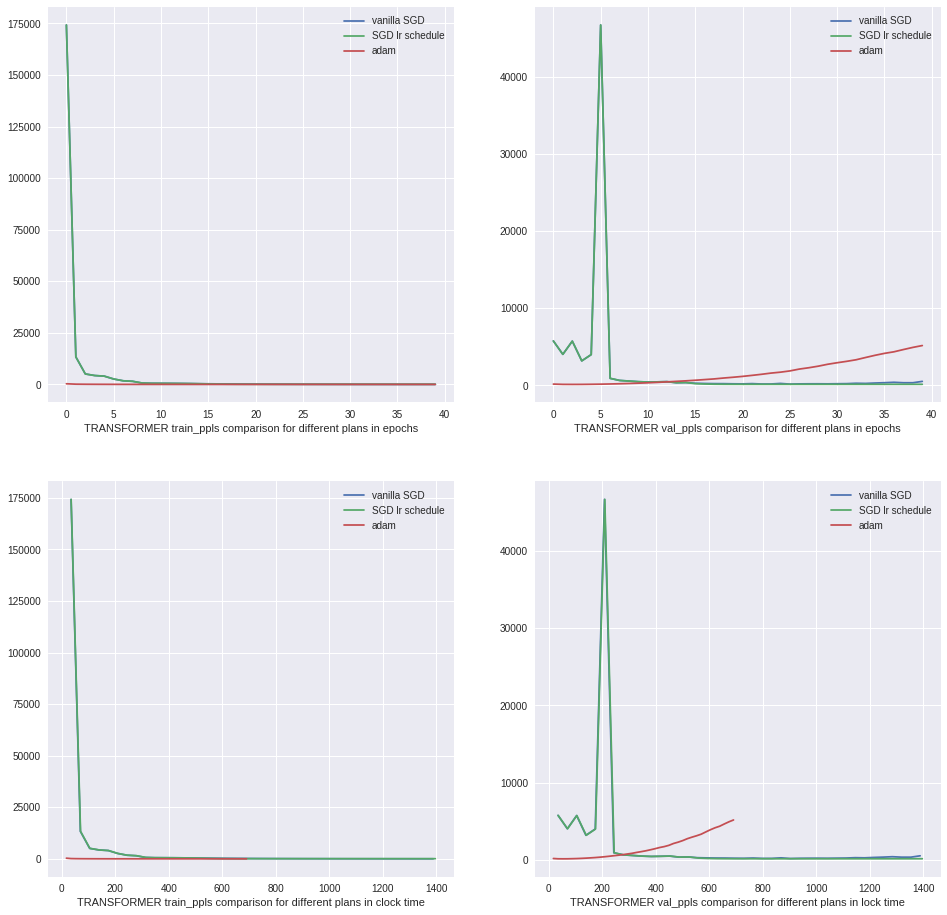

In [145]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(2, 2, 1)
plt.plot(lr[15][1], label= 'vanilla SGD')
plt.plot(lr[-2][1], label= 'SGD lr schedule')
plt.plot(lr[12][1], label= 'adam')
plt.xlabel("TRANSFORMER train_ppls comparison for different plans in epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lr[15][2], label= 'vanilla SGD')
plt.plot(lr[-2][2], label= 'SGD lr schedule')
plt.plot(lr[12][2], label= 'adam')
plt.xlabel("TRANSFORMER val_ppls comparison for different plans in epochs")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(clk_times[15][1],lr[15][1], label= 'vanilla SGD')
plt.plot(clk_times[-2][1],lr[-2][1], label= 'SGD lr schedule')
plt.plot(clk_times[12][1],lr[12][1], label= 'adam')
plt.xlabel("TRANSFORMER train_ppls comparison for different plans in clock time")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(clk_times[15][1],lr[15][2], label= 'vanilla SGD')
plt.plot(clk_times[-2][1],lr[-2][2], label= 'SGD lr schedule')
plt.plot(clk_times[12][1],lr[12][2], label= 'adam')
plt.xlabel("TRANSFORMER val_ppls comparison for different plans in lock time")
plt.legend()


fig.set_figheight(16)
fig.set_figwidth(16)
plt.show()

## QUESTION 4.3: TESTING DIFFERENT HYPERPARAMETERS OF EACH ARCHITECHTURE

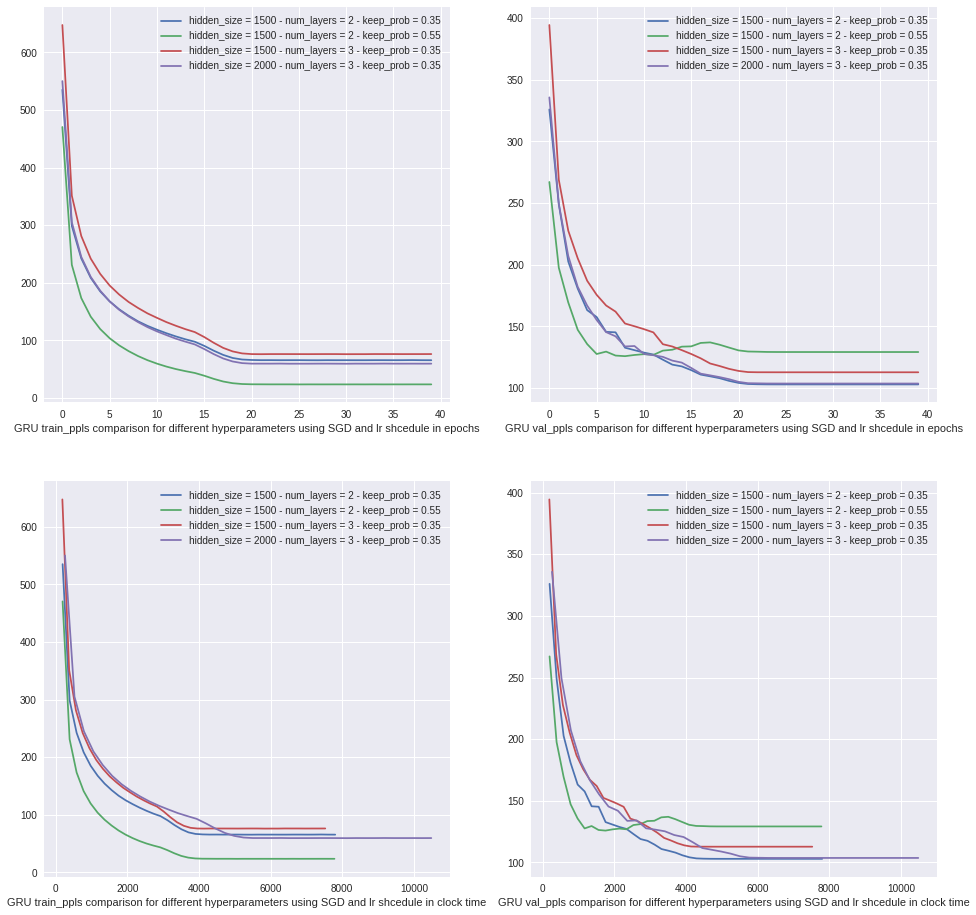

In [146]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(2, 2, 1)
plt.plot(lr[2][1], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.35')
plt.plot(lr[3][1], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.55')
plt.plot(lr[4][1], label= 'hidden_size = 1500 - num_layers = 3 - keep_prob = 0.35')
plt.plot(lr[5][1], label= 'hidden_size = 2000 - num_layers = 3 - keep_prob = 0.35')
plt.xlabel("GRU train_ppls comparison for different hyperparameters using SGD and lr shcedule in epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lr[2][2], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.35')
plt.plot(lr[3][2], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.55')
plt.plot(lr[4][2], label= 'hidden_size = 1500 - num_layers = 3 - keep_prob = 0.35')
plt.plot(lr[5][2], label= 'hidden_size = 2000 - num_layers = 3 - keep_prob = 0.35')
plt.xlabel("GRU val_ppls comparison for different hyperparameters using SGD and lr shcedule in epochs")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(clk_times[2][1],lr[2][1], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.35')
plt.plot(clk_times[3][1],lr[3][1], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.55')
plt.plot(clk_times[4][1],lr[4][1], label= 'hidden_size = 1500 - num_layers = 3 - keep_prob = 0.35')
plt.plot(clk_times[5][1],lr[5][1], label= 'hidden_size = 2000 - num_layers = 3 - keep_prob = 0.35')
plt.xlabel("GRU train_ppls comparison for different hyperparameters using SGD and lr shcedule in clock time")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clk_times[2][1],lr[2][2], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.35')
plt.plot(clk_times[3][1],lr[3][2], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.55')
plt.plot(clk_times[4][1],lr[4][2], label= 'hidden_size = 1500 - num_layers = 3 - keep_prob = 0.35')
plt.plot(clk_times[5][1],lr[5][2], label= 'hidden_size = 2000 - num_layers = 3 - keep_prob = 0.35')
plt.xlabel("GRU val_ppls comparison for different hyperparameters using SGD and lr shcedule in clock time")
plt.legend()

fig.set_figheight(16)
fig.set_figwidth(16)
plt.show()



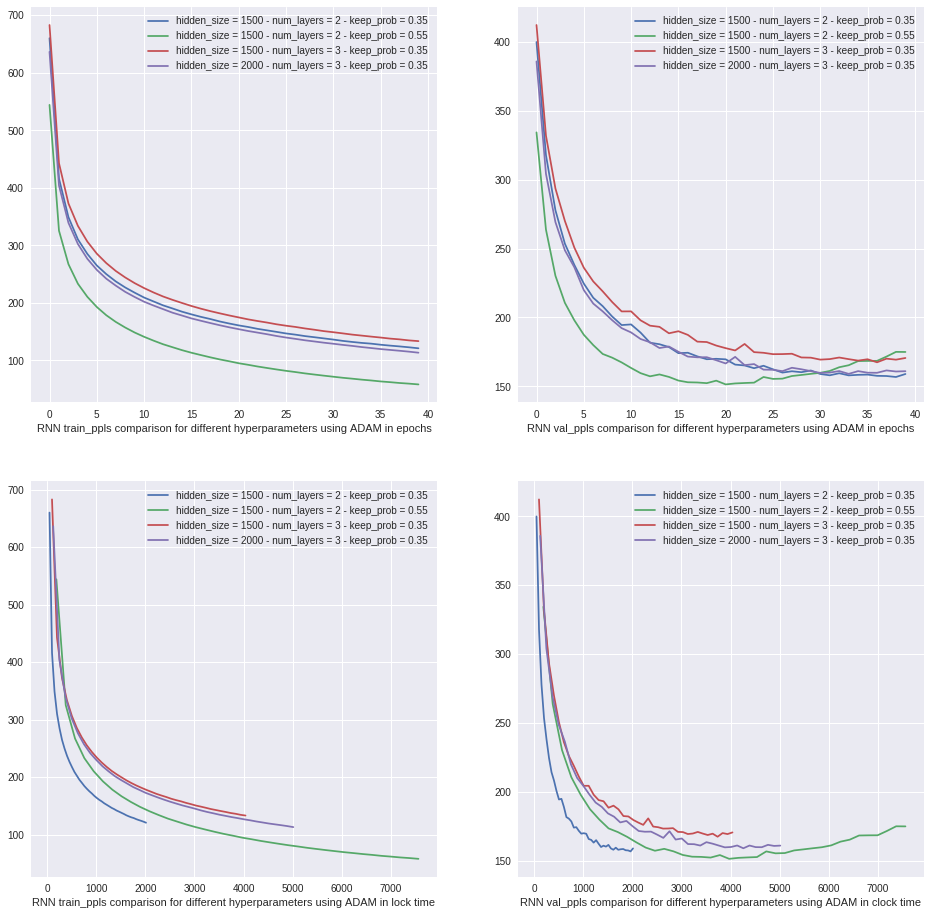

In [147]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(2, 2, 1)
plt.plot(lr[11][1], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.35')
plt.plot(lr[7][1], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.55')
plt.plot(lr[8][1], label= 'hidden_size = 1500 - num_layers = 3 - keep_prob = 0.35')
plt.plot(lr[9][1], label= 'hidden_size = 2000 - num_layers = 3 - keep_prob = 0.35')
plt.xlabel("RNN train_ppls comparison for different hyperparameters using ADAM in epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lr[11][2], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.35')
plt.plot(lr[7][2], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.55')
plt.plot(lr[8][2], label= 'hidden_size = 1500 - num_layers = 3 - keep_prob = 0.35')
plt.plot(lr[9][2], label= 'hidden_size = 2000 - num_layers = 3 - keep_prob = 0.35')
plt.xlabel("RNN val_ppls comparison for different hyperparameters using ADAM in epochs")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(clk_times[11][1],lr[11][1], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.35')
plt.plot(clk_times[7][1],lr[7][1], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.55')
plt.plot(clk_times[8][1],lr[8][1], label= 'hidden_size = 1500 - num_layers = 3 - keep_prob = 0.35')
plt.plot(clk_times[9][1],lr[9][1], label= 'hidden_size = 2000 - num_layers = 3 - keep_prob = 0.35')
plt.xlabel("RNN train_ppls comparison for different hyperparameters using ADAM in lock time")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clk_times[11][1],lr[11][2], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.35')
plt.plot(clk_times[7][1],lr[7][2], label= 'hidden_size = 1500 - num_layers = 2 - keep_prob = 0.55')
plt.plot(clk_times[8][1],lr[8][2], label= 'hidden_size = 1500 - num_layers = 3 - keep_prob = 0.35')
plt.plot(clk_times[9][1],lr[9][2], label= 'hidden_size = 2000 - num_layers = 3 - keep_prob = 0.35')
plt.xlabel("RNN val_ppls comparison for different hyperparameters using ADAM in clock time")
plt.legend()

fig.set_figheight(16)
fig.set_figwidth(16)
plt.show()




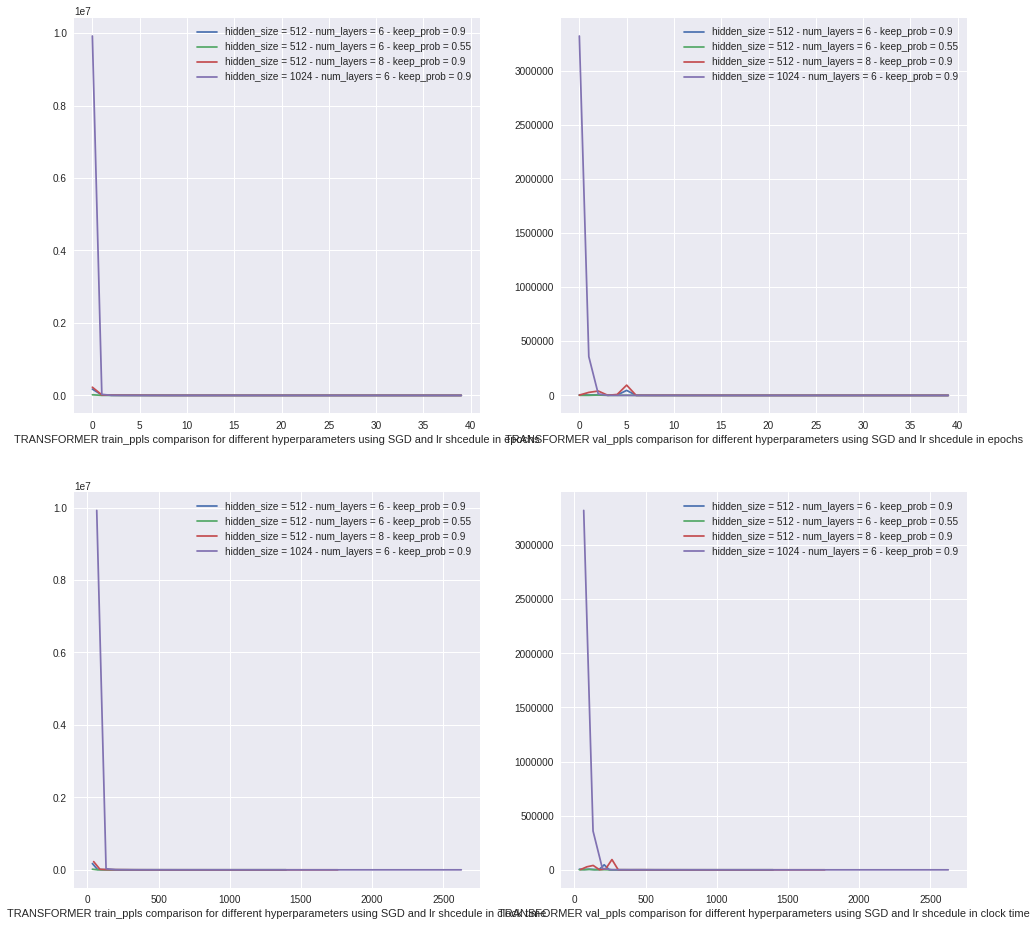

In [148]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(2, 2, 1)
plt.plot(lr[17][1], label= 'hidden_size = 512 - num_layers = 6 - keep_prob = 0.9')
plt.plot(lr[13][1], label= 'hidden_size = 512 - num_layers = 6 - keep_prob = 0.55')
plt.plot(lr[14][1], label= 'hidden_size = 512 - num_layers = 8 - keep_prob = 0.9')
plt.plot(lr[16][1], label= 'hidden_size = 1024 - num_layers = 6 - keep_prob = 0.9')
plt.xlabel("TRANSFORMER train_ppls comparison for different hyperparameters using SGD and lr shcedule in epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lr[17][2], label= 'hidden_size = 512 - num_layers = 6 - keep_prob = 0.9')
plt.plot(lr[13][2], label= 'hidden_size = 512 - num_layers = 6 - keep_prob = 0.55')
plt.plot(lr[14][2], label= 'hidden_size = 512 - num_layers = 8 - keep_prob = 0.9')
plt.plot(lr[16][2], label= 'hidden_size = 1024 - num_layers = 6 - keep_prob = 0.9')
plt.xlabel("TRANSFORMER val_ppls comparison for different hyperparameters using SGD and lr shcedule in epochs")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(clk_times[17][1],lr[17][1], label= 'hidden_size = 512 - num_layers = 6 - keep_prob = 0.9')
plt.plot(clk_times[13][1],lr[13][1], label= 'hidden_size = 512 - num_layers = 6 - keep_prob = 0.55')
plt.plot(clk_times[14][1],lr[14][1], label= 'hidden_size = 512 - num_layers = 8 - keep_prob = 0.9')
plt.plot(clk_times[16][1],lr[16][1], label= 'hidden_size = 1024 - num_layers = 6 - keep_prob = 0.9')
plt.xlabel("TRANSFORMER train_ppls comparison for different hyperparameters using SGD and lr shcedule in clock time")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clk_times[17][1],lr[17][2], label= 'hidden_size = 512 - num_layers = 6 - keep_prob = 0.9')
plt.plot(clk_times[13][1],lr[13][2], label= 'hidden_size = 512 - num_layers = 6 - keep_prob = 0.55')
plt.plot(clk_times[14][1],lr[14][2], label= 'hidden_size = 512 - num_layers = 8 - keep_prob = 0.9')
plt.plot(clk_times[16][1],lr[16][2], label= 'hidden_size = 1024 - num_layers = 6 - keep_prob = 0.9')
plt.xlabel("TRANSFORMER val_ppls comparison for different hyperparameters using SGD and lr shcedule in clock time")
plt.legend()


fig.set_figheight(16)
fig.set_figwidth(16)
plt.show()




## VALIDATION CURVES FOR optimizers

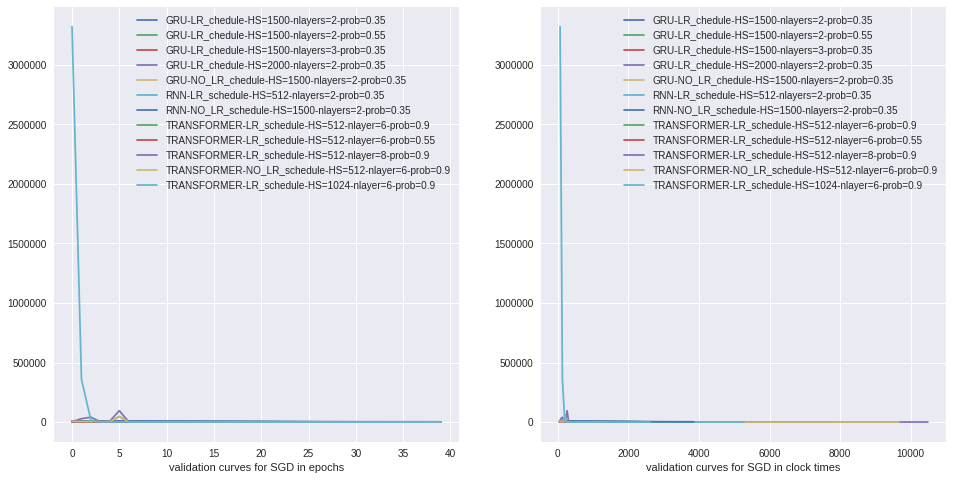

In [150]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(lr[2][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[3][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.55')
plt.plot(lr[4][2], label= 'GRU-LR_chedule-HS=1500-nlayers=3-prob=0.35')
plt.plot(lr[5][2], label= 'GRU-LR_chedule-HS=2000-nlayers=2-prob=0.35')
plt.plot(lr[6][2], label= 'GRU-NO_LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[10][2], label= 'RNN-LR_schedule-HS=512-nlayers=2-prob=0.35')
plt.plot(lr[-1][2], label= 'RNN-NO_LR_schedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[17][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(lr[13][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.55')
plt.plot(lr[14][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=8-prob=0.9')
plt.plot(lr[15][2], label= 'TRANSFORMER-NO_LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(lr[16][2], label= 'TRANSFORMER-LR_schedule-HS=1024-nlayer=6-prob=0.9')
plt.xlabel("validation curves for SGD in epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(clk_times[2][1],lr[2][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[3][1],lr[3][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.55')
plt.plot(clk_times[4][1],lr[4][2], label= 'GRU-LR_chedule-HS=1500-nlayers=3-prob=0.35')
plt.plot(clk_times[5][1],lr[5][2], label= 'GRU-LR_chedule-HS=2000-nlayers=2-prob=0.35')
plt.plot(clk_times[6][1],lr[6][2], label= 'GRU-NO_LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[10][1],lr[10][2], label= 'RNN-LR_schedule-HS=512-nlayers=2-prob=0.35')
plt.plot(clk_times[-1][1],lr[-1][2], label= 'RNN-NO_LR_schedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[17][1],lr[17][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(clk_times[13][1],lr[13][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.55')
plt.plot(clk_times[14][1],lr[14][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=8-prob=0.9')
plt.plot(clk_times[15][1],lr[15][2], label= 'TRANSFORMER-NO_LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(clk_times[16][1],lr[16][2], label= 'TRANSFORMER-LR_schedule-HS=1024-nlayer=6-prob=0.9')
plt.xlabel("validation curves for SGD in clock times")
plt.legend()

fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()

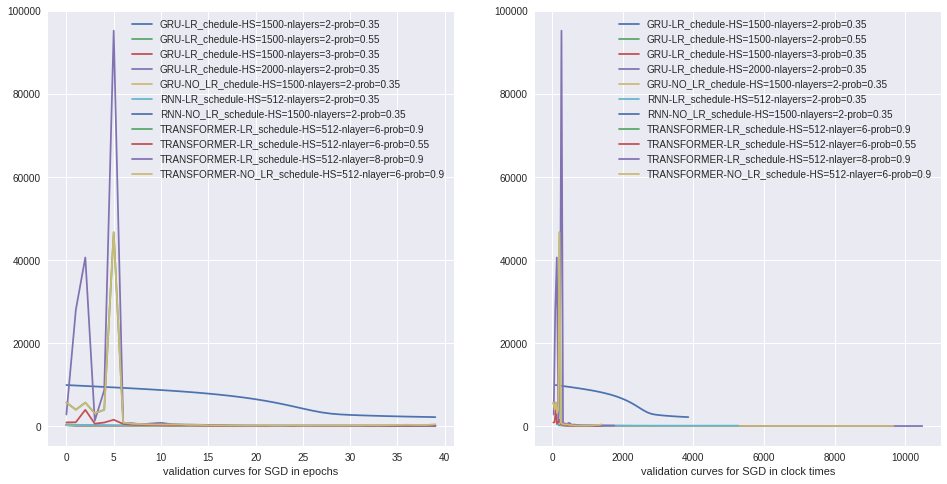

In [152]:
#SAME AS BEFORE BUT WITHOUT LIGHT BLUE FIGURE (TO ZOOM ON THE OTHERS)
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(lr[2][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[3][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.55')
plt.plot(lr[4][2], label= 'GRU-LR_chedule-HS=1500-nlayers=3-prob=0.35')
plt.plot(lr[5][2], label= 'GRU-LR_chedule-HS=2000-nlayers=2-prob=0.35')
plt.plot(lr[6][2], label= 'GRU-NO_LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[10][2], label= 'RNN-LR_schedule-HS=512-nlayers=2-prob=0.35')
plt.plot(lr[-1][2], label= 'RNN-NO_LR_schedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[17][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(lr[13][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.55')
plt.plot(lr[14][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=8-prob=0.9')
plt.plot(lr[15][2], label= 'TRANSFORMER-NO_LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.xlabel("validation curves for SGD in epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(clk_times[2][1],lr[2][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[3][1],lr[3][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.55')
plt.plot(clk_times[4][1],lr[4][2], label= 'GRU-LR_chedule-HS=1500-nlayers=3-prob=0.35')
plt.plot(clk_times[5][1],lr[5][2], label= 'GRU-LR_chedule-HS=2000-nlayers=2-prob=0.35')
plt.plot(clk_times[6][1],lr[6][2], label= 'GRU-NO_LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[10][1],lr[10][2], label= 'RNN-LR_schedule-HS=512-nlayers=2-prob=0.35')
plt.plot(clk_times[-1][1],lr[-1][2], label= 'RNN-NO_LR_schedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[17][1],lr[17][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(clk_times[13][1],lr[13][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.55')
plt.plot(clk_times[14][1],lr[14][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=8-prob=0.9')
plt.plot(clk_times[15][1],lr[15][2], label= 'TRANSFORMER-NO_LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.xlabel("validation curves for SGD in clock times")
plt.legend()

fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()

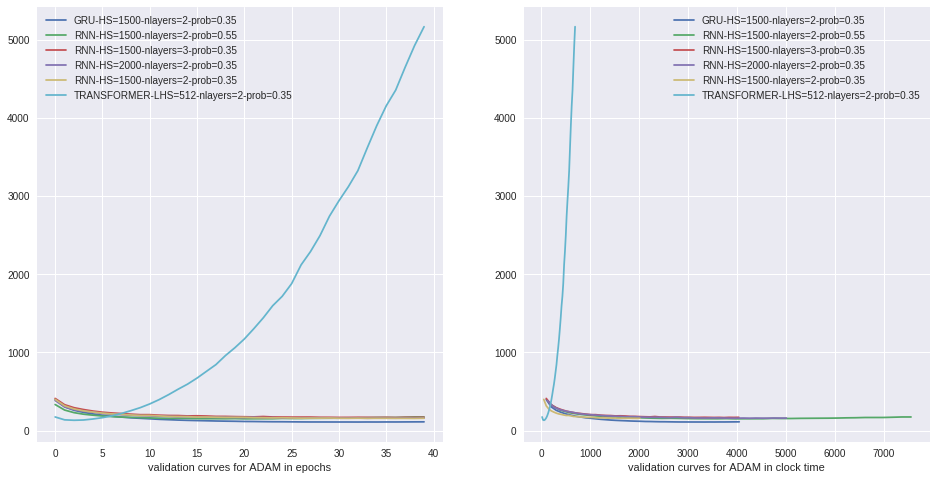

In [153]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(lr[1][2], label= 'GRU-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[7][2], label= 'RNN-HS=1500-nlayers=2-prob=0.55')
plt.plot(lr[8][2], label= 'RNN-HS=1500-nlayers=3-prob=0.35')
plt.plot(lr[9][2], label= 'RNN-HS=2000-nlayers=2-prob=0.35')
plt.plot(lr[11][2], label= 'RNN-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[12][2], label= 'TRANSFORMER-LHS=512-nlayers=2-prob=0.35')
plt.xlabel("validation curves for ADAM in epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(clk_times[1][1],lr[1][2], label= 'GRU-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[7][1],lr[7][2], label= 'RNN-HS=1500-nlayers=2-prob=0.55')
plt.plot(clk_times[8][1],lr[8][2], label= 'RNN-HS=1500-nlayers=3-prob=0.35')
plt.plot(clk_times[9][1],lr[9][2], label= 'RNN-HS=2000-nlayers=2-prob=0.35')
plt.plot(clk_times[11][1],lr[11][2], label= 'RNN-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[12][1],lr[12][2], label= 'TRANSFORMER-LHS=512-nlayers=2-prob=0.35')
plt.xlabel("validation curves for ADAM in clock time")
plt.legend()

fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()



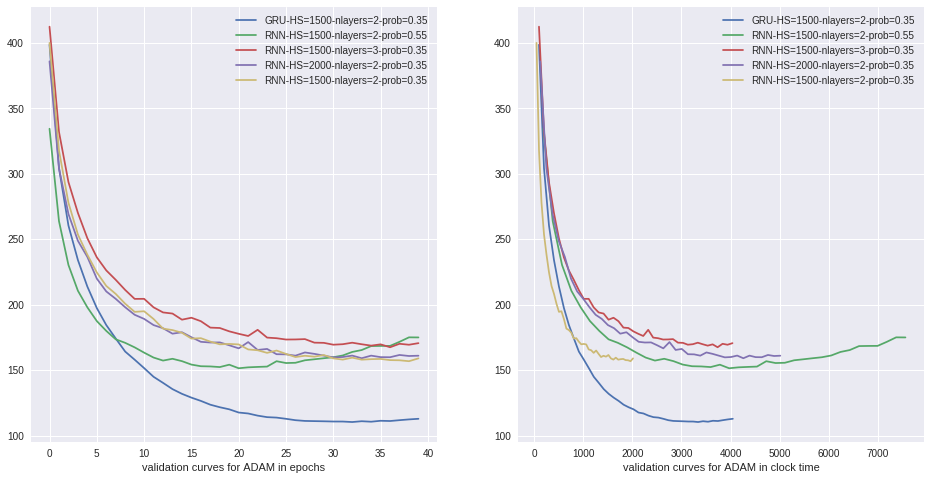

In [154]:
#SAME WITHOUT BIASED ONE
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(lr[1][2], label= 'GRU-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[7][2], label= 'RNN-HS=1500-nlayers=2-prob=0.55')
plt.plot(lr[8][2], label= 'RNN-HS=1500-nlayers=3-prob=0.35')
plt.plot(lr[9][2], label= 'RNN-HS=2000-nlayers=2-prob=0.35')
plt.plot(lr[11][2], label= 'RNN-HS=1500-nlayers=2-prob=0.35')
plt.xlabel("validation curves for ADAM in epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(clk_times[1][1],lr[1][2], label= 'GRU-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[7][1],lr[7][2], label= 'RNN-HS=1500-nlayers=2-prob=0.55')
plt.plot(clk_times[8][1],lr[8][2], label= 'RNN-HS=1500-nlayers=3-prob=0.35')
plt.plot(clk_times[9][1],lr[9][2], label= 'RNN-HS=2000-nlayers=2-prob=0.35')
plt.plot(clk_times[11][1],lr[11][2], label= 'RNN-HS=1500-nlayers=2-prob=0.35')
plt.xlabel("validation curves for ADAM in clock time")
plt.legend()

fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()



## VALIDATION CURVES FOR ARCHITECHTURES

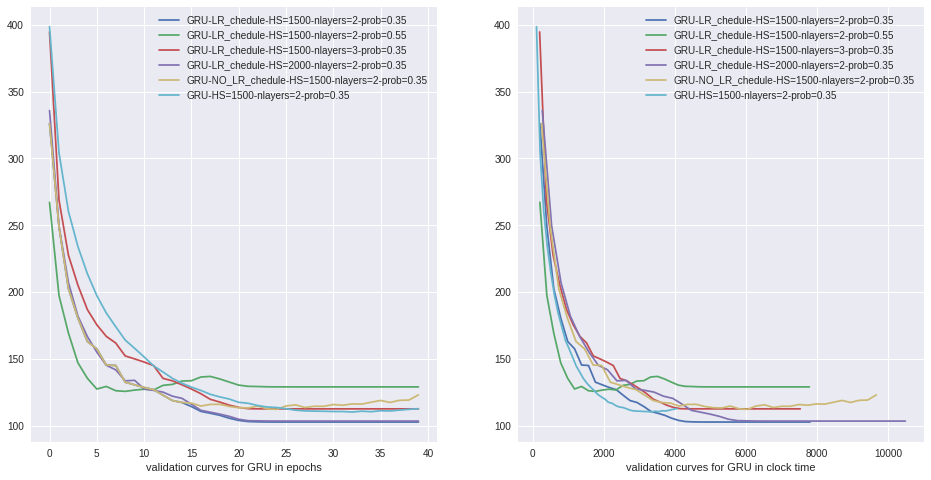

In [156]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(lr[2][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[3][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.55')
plt.plot(lr[4][2], label= 'GRU-LR_chedule-HS=1500-nlayers=3-prob=0.35')
plt.plot(lr[5][2], label= 'GRU-LR_chedule-HS=2000-nlayers=2-prob=0.35')
plt.plot(lr[6][2], label= 'GRU-NO_LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[1][2], label= 'GRU-HS=1500-nlayers=2-prob=0.35')
plt.xlabel("validation curves for GRU in epochs")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(clk_times[2][1],lr[2][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[3][1],lr[3][2], label= 'GRU-LR_chedule-HS=1500-nlayers=2-prob=0.55')
plt.plot(clk_times[4][1],lr[4][2], label= 'GRU-LR_chedule-HS=1500-nlayers=3-prob=0.35')
plt.plot(clk_times[5][1],lr[5][2], label= 'GRU-LR_chedule-HS=2000-nlayers=2-prob=0.35')
plt.plot(clk_times[6][1],lr[6][2], label= 'GRU-NO_LR_chedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[1][1],lr[1][2], label= 'GRU-HS=1500-nlayers=2-prob=0.35')
plt.xlabel("validation curves for GRU in clock time")
plt.legend()

fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()



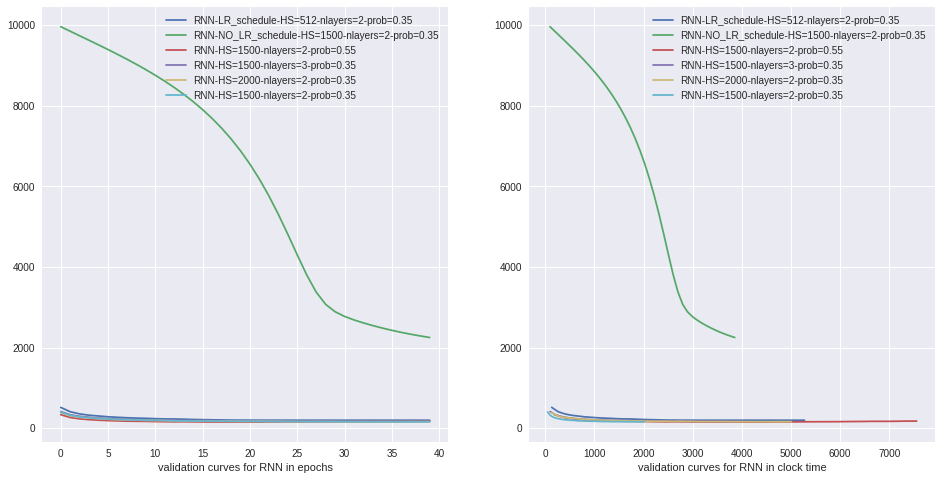

In [157]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(lr[10][2], label= 'RNN-LR_schedule-HS=512-nlayers=2-prob=0.35')
plt.plot(lr[-1][2], label= 'RNN-NO_LR_schedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(lr[7][2], label= 'RNN-HS=1500-nlayers=2-prob=0.55')
plt.plot(lr[8][2], label= 'RNN-HS=1500-nlayers=3-prob=0.35')
plt.plot(lr[9][2], label= 'RNN-HS=2000-nlayers=2-prob=0.35')
plt.plot(lr[11][2], label= 'RNN-HS=1500-nlayers=2-prob=0.35')
plt.xlabel("validation curves for RNN in epochs")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(clk_times[10][1],lr[10][2], label= 'RNN-LR_schedule-HS=512-nlayers=2-prob=0.35')
plt.plot(clk_times[-1][1],lr[-1][2], label= 'RNN-NO_LR_schedule-HS=1500-nlayers=2-prob=0.35')
plt.plot(clk_times[7][1],lr[7][2], label= 'RNN-HS=1500-nlayers=2-prob=0.55')
plt.plot(clk_times[8][1],lr[8][2], label= 'RNN-HS=1500-nlayers=3-prob=0.35')
plt.plot(clk_times[9][1],lr[9][2], label= 'RNN-HS=2000-nlayers=2-prob=0.35')
plt.plot(clk_times[11][1],lr[11][2], label= 'RNN-HS=1500-nlayers=2-prob=0.35')
plt.xlabel("validation curves for RNN in clock time")
plt.legend()

fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()


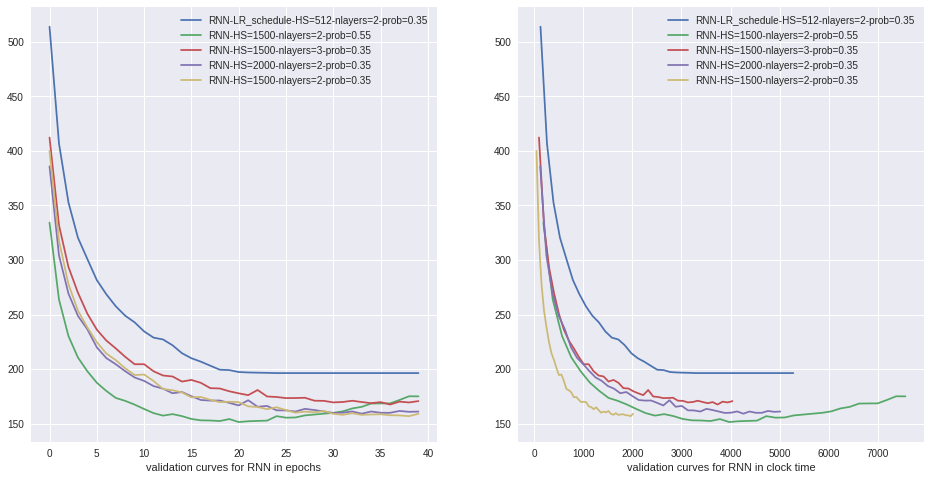

In [158]:
#SAME WITHOUT BIASED GREEN CURVE
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(lr[10][2], label= 'RNN-LR_schedule-HS=512-nlayers=2-prob=0.35')
plt.plot(lr[7][2], label= 'RNN-HS=1500-nlayers=2-prob=0.55')
plt.plot(lr[8][2], label= 'RNN-HS=1500-nlayers=3-prob=0.35')
plt.plot(lr[9][2], label= 'RNN-HS=2000-nlayers=2-prob=0.35')
plt.plot(lr[11][2], label= 'RNN-HS=1500-nlayers=2-prob=0.35')
plt.xlabel("validation curves for RNN in epochs")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(clk_times[10][1],lr[10][2], label= 'RNN-LR_schedule-HS=512-nlayers=2-prob=0.35')
plt.plot(clk_times[7][1],lr[7][2], label= 'RNN-HS=1500-nlayers=2-prob=0.55')
plt.plot(clk_times[8][1],lr[8][2], label= 'RNN-HS=1500-nlayers=3-prob=0.35')
plt.plot(clk_times[9][1],lr[9][2], label= 'RNN-HS=2000-nlayers=2-prob=0.35')
plt.plot(clk_times[11][1],lr[11][2], label= 'RNN-HS=1500-nlayers=2-prob=0.35')
plt.xlabel("validation curves for RNN in clock time")
plt.legend()

fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()


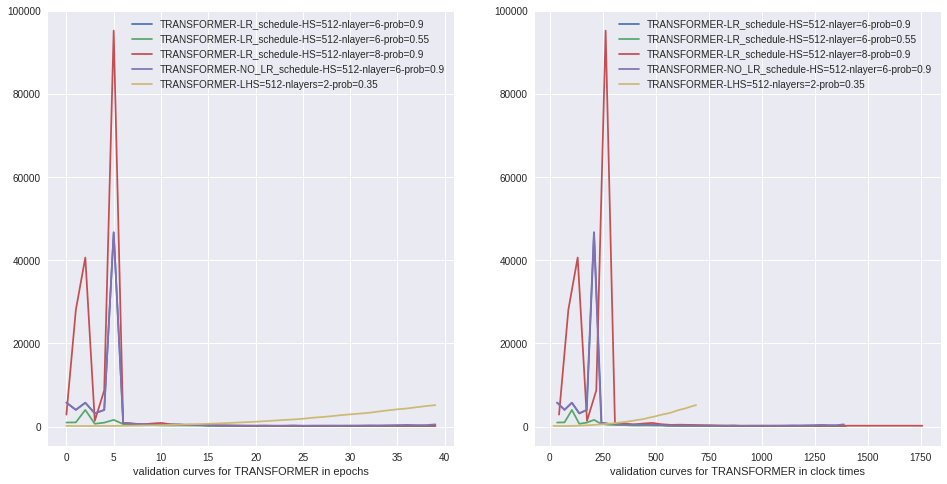

In [159]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(lr[17][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(lr[13][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.55')
plt.plot(lr[14][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=8-prob=0.9')
plt.plot(lr[15][2], label= 'TRANSFORMER-NO_LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(lr[12][2], label= 'TRANSFORMER-LHS=512-nlayers=2-prob=0.35')
plt.xlabel("validation curves for TRANSFORMER in epochs")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(clk_times[17][1],lr[17][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(clk_times[13][1],lr[13][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=6-prob=0.55')
plt.plot(clk_times[14][1],lr[14][2], label= 'TRANSFORMER-LR_schedule-HS=512-nlayer=8-prob=0.9')
plt.plot(clk_times[15][1],lr[15][2], label= 'TRANSFORMER-NO_LR_schedule-HS=512-nlayer=6-prob=0.9')
plt.plot(clk_times[12][1],lr[12][2], label= 'TRANSFORMER-LHS=512-nlayers=2-prob=0.35')
plt.xlabel("validation curves for TRANSFORMER in clock times")
plt.legend()


fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()



In [0]:
#CODE FOR COPYING log.txt OF EACH OF BEST EXPERIMENTS IN clock-times DIRECTORY

import shutil

src = "/content/gdrive/My Drive/deep-learning/assignment-2/"
dest = "/content/gdrive/My Drive/deep-learning/assignment-2/clock-times"

for file_name in lf:
  if file_name == 'RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_7':
    continue
  full_dir_name = os.path.join(src, file_name)
  shutil.copy(full_dir_name+'/log.txt', dest+'/'+file_name+'.txt')

In [0]:
def get_time(l):
  clk_times = []
  for e in l:
    b = e.split(' ')
    if len(clk_times)>0:
      clk_times.append(clk_times[-1]+float(b[-1][:-1]))
    else:
      clk_times.append(float(b[-1][:-1]))
  return clk_times

In [0]:
path = "/content/gdrive/My Drive/deep-learning/assignment-2/clock-times"

clk_times = [['name','list of clk_times']]

src_files = os.listdir(path)
for file in src_files:
  f = open(os.path.join(path,file), 'r')
  a = f.readlines()
  a = get_time(a)
  clk_times.append([file[:-4],a])
  f.close()

In [101]:
for e in clk_times:
  print(e[0])

name
RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_7
GRU_ADAM_model=GRU_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_4
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_7
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.55_2
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=3_dp_keep_prob=0.35_3
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=2000_num_layers=2_dp_keep_prob=0.35_3
GRU_SGD_model=GRU_optimizer=SGD_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_4
RNN_ADAM_model=RNN_o

In [102]:
for e in lr:
  print(e[0])

name
GRU_ADAM_model=GRU_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_4.npy
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_7.npy
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.55_2.npy
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=3_dp_keep_prob=0.35_3.npy
GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=2000_num_layers=2_dp_keep_prob=0.35_3.npy
GRU_SGD_model=GRU_optimizer=SGD_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_4.npy
RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.55_2.npy
RN